In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

In [ ]:
dataset = pd.read_csv('/content/automobileEDA.csv')
dataset.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
dataset.shape

(201, 29)

In [ ]:
dataset.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [ ]:
data = dataset[['price','engine-size']]
correlation = data.corr(method='pearson')
correlation

,price,engine-size
price,1.000000,0.872335
engine-size,0.872335,1.000000


In [ ]:
dataset.corr()['price']

symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082310
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
city-L/100km         0.789898
diesel               0.110326
gas                 -0.110326
Name: price, dtype: float64

In [ ]:
dataset['peak-rpm'].dtypes

dtype('float64')

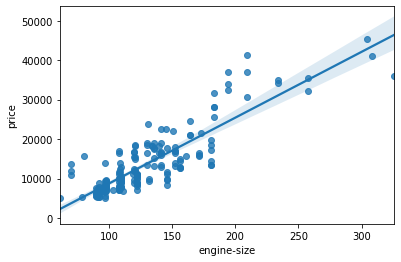

In [ ]:
sns.regplot(dataset['engine-size'], dataset['price'])

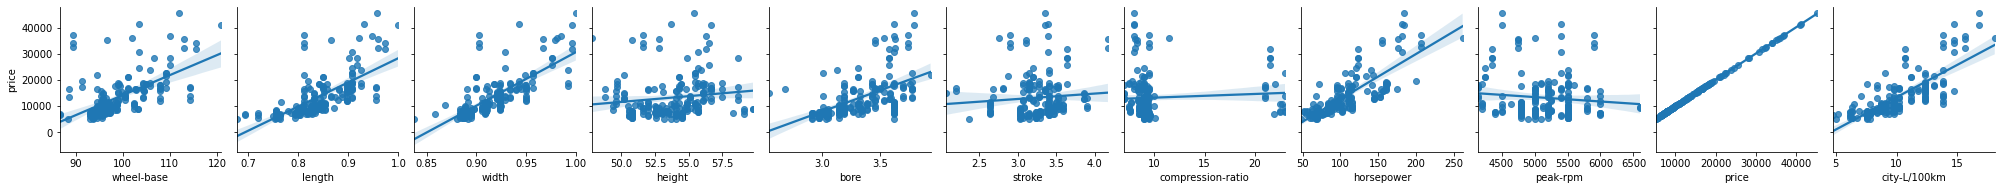

In [ ]:
sns.pairplot(dataset, y_vars=['price'], x_vars=dataset.select_dtypes('float64').columns, kind='reg')

In [ ]:
plt.figure(figsize=(15,11))
ax = sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

TypeError: ignored

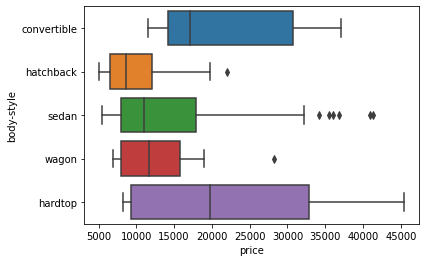

In [ ]:
sns.boxplot(x=dataset["price"],y=dataset["body-style"])

In [ ]:
dataset.describe(include='object')

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [ ]:
cat_col=dataset.columns[dataset.dtypes=='object']
for i in cat_col:
    print(str(i)+'->column unique values are :\n'+str(dataset[i].value_counts()))

make->column unique values are :
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
saab              6
audi              6
porsche           4
chevrolet         3
alfa-romero       3
jaguar            3
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64
aspiration->column unique values are :
std      165
turbo     36
Name: aspiration, dtype: int64
num-of-doors->column unique values are :
four    115
two      86
Name: num-of-doors, dtype: int64
body-style->column unique values are :
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64
drive-wheels->column unique values are :
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64
engine-location->column unique values are

In [ ]:
dataset.groupby('drive-wheels').mean()['price']

drive-wheels
4wd    10241.000000
fwd     9244.779661
rwd    19757.613333
Name: price, dtype: float64

In [ ]:
dataset.groupby(['make','aspiration','num-of-doors','body-style','engine-location','engine-type','num-of-cylinders','fuel-system','horsepower-binned']).mean()['price']

make         aspiration  num-of-doors  body-style   engine-location  engine-type  num-of-cylinders  fuel-system  horsepower-binned
alfa-romero  std         two           convertible  front            dohc         four              mpfi         Medium               14997.5
                                       hatchback    front            ohcv         six               mpfi         Medium               16500.0
audi         std         four          sedan        front            ohc          five              mpfi         Medium               17580.0
                                                                                  four              mpfi         Medium               13950.0
                                       wagon        front            ohc          five              mpfi         Medium               18920.0
                                                                                                                                       ...   
volvo        std 

In [ ]:
dataset.groupby(['drive-wheels','body-style']).mean()['price']

drive-wheels  body-style 
4wd           hatchback       7603.000000
              sedan          12647.333333
              wagon           9095.750000
fwd           convertible    11595.000000
              hardtop         8249.000000
              hatchback       8396.387755
              sedan           9811.800000
              wagon           9997.333333
rwd           convertible    23949.600000
              hardtop        24202.714286
              hatchback      14337.777778
              sedan          21711.833333
              wagon          16994.222222
Name: price, dtype: float64

In [ ]:
dataset.reset_index().pivot_table(index='drive-wheels',columns='body-style')

bore                      ...     width                    
body-style   convertible   hardtop hatchback  ... hatchback     sedan     wagon
drive-wheels                                  ...                              
4wd                  NaN       NaN  3.620000  ...  0.886111  0.912963  0.895833
fwd                3.190  3.150000  3.167143  ...  0.898214  0.908182  0.910185
rwd                3.552  3.674286  3.402167  ...  0.921605  0.941435  0.944444

[3 rows x 100 columns]